<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_data(y_hat)_add_delta_(4)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_4'

In [4]:
os.listdir(base_path)

['data_add_delta_4_n20.csv',
 'data_add_delta_4_n30.csv',
 'data_add_delta_4_n60.csv',
 'data_add_delta_4_n120.csv',
 'data_add_delta_4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_4_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,40.408879,91.751331,4513.927679,4656.087889,-2258.549943,6914.637833
1,0.0,1.0,47.462781,41.442749,1228.522035,1327.427566,-133.081064,1460.508630
2,0.0,2.0,39.329243,68.251668,-4778.446673,-4660.865763,-1349.634853,-3311.230909
3,0.0,3.0,26.897781,38.877686,1163.800779,1239.576246,-426.088544,1665.664790
4,0.0,4.0,56.296051,34.924581,-1353.877900,-1252.657267,294.211885,-1546.869152
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,21.103743,78.618783,-14687.502719,-14577.780192,-208.665569,-14369.114623
249996,999.0,246.0,36.912995,63.798601,1078.821547,1189.533143,-41.980035,1231.513177
249997,999.0,247.0,71.429212,23.723388,-134.305847,-29.153247,351.811889,-380.965136
249998,999.0,248.0,24.851496,66.310365,2175.814667,2276.976527,-135.115634,2412.092162


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,40.408879,91.751331,4513.927679,4656.087889,-2258.549943,6914.637833
1,0.0,1.0,47.462781,41.442749,1228.522035,1327.427566,-133.081064,1460.508630
2,0.0,2.0,39.329243,68.251668,-4778.446673,-4660.865763,-1349.634853,-3311.230909
3,0.0,3.0,26.897781,38.877686,1163.800779,1239.576246,-426.088544,1665.664790
4,0.0,4.0,56.296051,34.924581,-1353.877900,-1252.657267,294.211885,-1546.869152
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,21.103743,78.618783,-14687.502719,-14577.780192,-208.665569,-14369.114623
249996,999.0,246.0,36.912995,63.798601,1078.821547,1189.533143,-41.980035,1231.513177
249997,999.0,247.0,71.429212,23.723388,-134.305847,-29.153247,351.811889,-380.965136
249998,999.0,248.0,24.851496,66.310365,2175.814667,2276.976527,-135.115634,2412.092162


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2             e             Y        y_hat  \
rep   index                                                                  
0.0   0.0    40.408879  91.751331   4513.927679   4656.087889 -2258.549943   
      1.0    47.462781  41.442749   1228.522035   1327.427566  -133.081064   
      2.0    39.329243  68.251668  -4778.446673  -4660.865763 -1349.634853   
      3.0    26.897781  38.877686   1163.800779   1239.576246  -426.088544   
      4.0    56.296051  34.924581  -1353.877900  -1252.657267   294.211885   
...                ...        ...           ...           ...          ...   
999.0 245.0  21.103743  78.618783 -14687.502719 -14577.780192  -208.665569   
      246.0  36.912995  63.798601   1078.821547   1189.533143   -41.980035   
      247.0  71.429212  23.723388   -134.305847    -29.153247   351.811889   
      248.0  24.851496  66.310365   2175.814667   2276.976527  -135.115634   
      249.0  68.304071  39.025747  -1863.282491  -1745.952673   270.981922   

                    e_hat  
rep   index                
0.0   0.0     6914.637833  
      1.0     1460.508630  
      2.0    -3311.230909  
      3.0     1665.664790  
      4.0    -1546.869152  
...                   ...  
999.0 245.0 -14369.114623  
      246.0   1231.513177  
      247.0   -380.965136  
      248.0   2412.092162  
      249.0  -2016.934595  

[250000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2             e             Y        y_hat  \
rep   index                                                                  
0.0   0.0    40.408879  91.751331   4513.927679   4656.087889 -2258.549943   
      1.0    47.462781  41.442749   1228.522035   1327.427566  -133.081064   
      2.0    39.329243  68.251668  -4778.446673  -4660.865763 -1349.634853   
      3.0    26.897781  38.877686   1163.800779   1239.576246  -426.088544   
      4.0    56.296051  34.924581  -1353.877900  -1252.657267   294.211885   
...                ...        ...           ...           ...          ...   
999.0 245.0  21.103743  78.618783 -14687.502719 -14577.780192  -208.665569   
      246.0  36.912995  63.798601   1078.821547   1189.533143   -41.980035   
      247.0  71.429212  23.723388   -134.305847    -29.153247   351.811889   
      248.0  24.851496  66.310365   2175.814667   2276.976527  -135.115634   
      249.0  68.304071  39.025747  -1863.282491  -1745.952673   270.981922   

                    e_hat  
rep   index                
0.0   0.0     6914.637833  
      1.0     1460.508630  
      2.0    -3311.230909  
      3.0     1665.664790  
      4.0    -1546.869152  
...                   ...  
999.0 245.0 -14369.114623  
      246.0   1231.513177  
      247.0   -380.965136  
      248.0   2412.092162  
      249.0  -2016.934595  

[250000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,40.408879,91.751331,4513.927679,4656.087889,-2258.549943,6914.637833
1,0.0,1.0,47.462781,41.442749,1228.522035,1327.427566,-133.081064,1460.508630
2,0.0,2.0,39.329243,68.251668,-4778.446673,-4660.865763,-1349.634853,-3311.230909
3,0.0,3.0,26.897781,38.877686,1163.800779,1239.576246,-426.088544,1665.664790
4,0.0,4.0,56.296051,34.924581,-1353.877900,-1252.657267,294.211885,-1546.869152
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,21.103743,78.618783,-14687.502719,-14577.780192,-208.665569,-14369.114623
249996,999.0,246.0,36.912995,63.798601,1078.821547,1189.533143,-41.980035,1231.513177
249997,999.0,247.0,71.429212,23.723388,-134.305847,-29.153247,351.811889,-380.965136
249998,999.0,248.0,24.851496,66.310365,2175.814667,2276.976527,-135.115634,2412.092162


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2             e             Y        y_hat  \
rep   index                                                                  
0.0   0.0    40.408879  91.751331   4513.927679   4656.087889 -2258.549943   
      1.0    47.462781  41.442749   1228.522035   1327.427566  -133.081064   
      2.0    39.329243  68.251668  -4778.446673  -4660.865763 -1349.634853   
      3.0    26.897781  38.877686   1163.800779   1239.576246  -426.088544   
      4.0    56.296051  34.924581  -1353.877900  -1252.657267   294.211885   
...                ...        ...           ...           ...          ...   
999.0 245.0  21.103743  78.618783 -14687.502719 -14577.780192  -208.665569   
      246.0  36.912995  63.798601   1078.821547   1189.533143   -41.980035   
      247.0  71.429212  23.723388   -134.305847    -29.153247   351.811889   
      248.0  24.851496  66.310365   2175.814667   2276.976527  -135.115634   
      249.0  68.304071  39.025747  -1863.282491  -1745.952673   270.981922   

                    e_hat  
rep   index                
0.0   0.0     6914.637833  
      1.0     1460.508630  
      2.0    -3311.230909  
      3.0     1665.664790  
      4.0    -1546.869152  
...                   ...  
999.0 245.0 -14369.114623  
      246.0   1231.513177  
      247.0   -380.965136  
      248.0   2412.092162  
      249.0  -2016.934595  

[250000 rows x 6 columns]

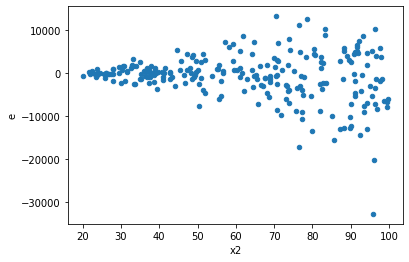

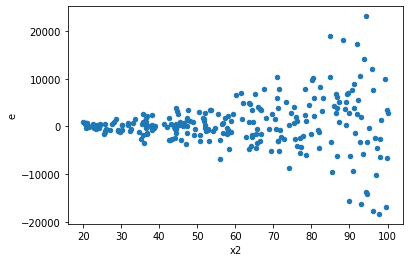

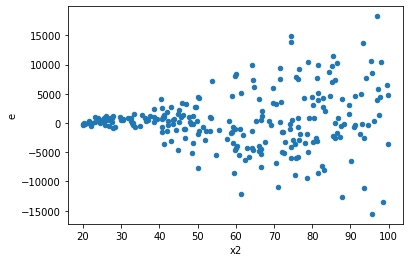

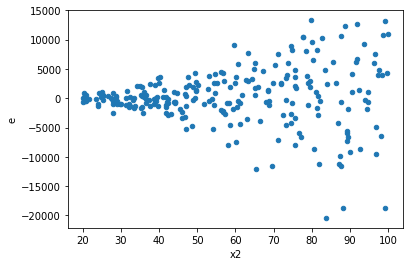

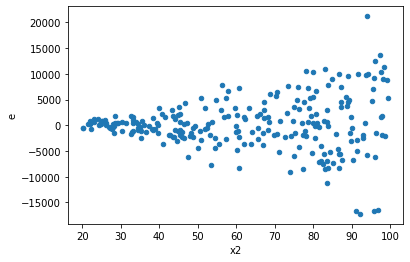

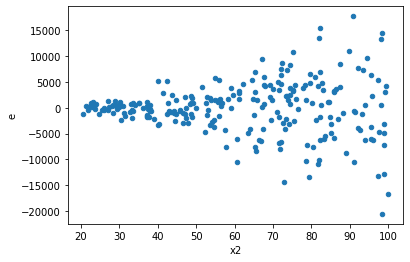

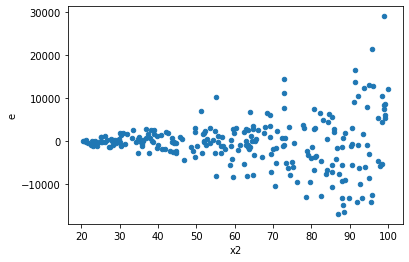

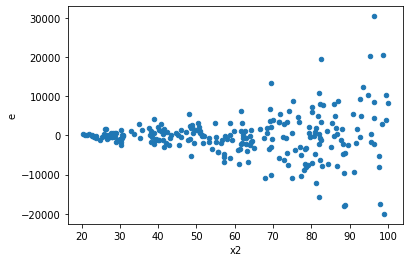

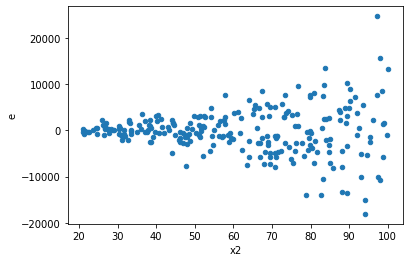

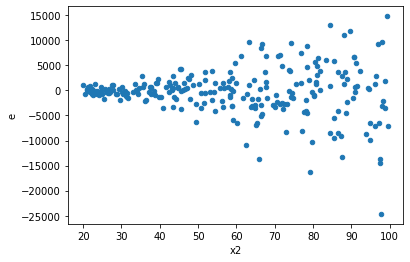

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,98.0,98.0,1743087638.5307577,3208860250.485692,17786608.556436304,32743471.94373155,1.8409058612740943,0.0027889897733377467,0.9986055051133311,0.0013944948866688733,Reject005=0 : Heteroscedasticity
2.0,98.0,98.0,358207734.03463554,4228524477.4954433,3655180.9595370973,43148208.95403513,11.804671076941577,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
3.0,98.0,98.0,301445231.76507455,5003614215.652414,3075971.7527048425,51057287.91482055,16.59875058017797,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
4.0,98.0,98.0,566276803.6215326,4788339487.087649,5778334.730831965,48860607.01109846,8.455828415475596,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
7.0,98.0,98.0,241899733.962609,6680056754.709314,2468364.6322715203,68163844.43580933,27.614981816151424,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
11.0,98.0,98.0,1789772017.2214568,3597681849.7154346,18262979.767565884,36711039.282810554,2.010134148426725,0.0006422286574201408,0.9996788856712899,0.0003211143287100704,Reject005=0 : Heteroscedasticity
12.0,98.0,98.0,285707677.6414922,4021549201.8988247,2915384.4657295123,41036216.34590638,14.075747754126125,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
14.0,98.0,98.0,592351271.0045261,4403430679.149953,6044400.724535981,44932966.11377503,7.433816545514437,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
17.0,98.0,98.0,262235291.648626,5035799658.276392,2675870.322945163,51385710.798738696,19.2033636152374,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,98.0,98.0,5072601061.096038,412628123.2659942,51761235.31730651,4210491.053734635,0.08134448546143654,5.661219829767837e-29,Reject005=0 : Heteroscedasticity
1.0,98.0,98.0,1743087638.5307577,3208860250.485692,17786608.556436304,32743471.94373155,1.8409058612740943,0.0027889897733377467,Reject005=0 : Heteroscedasticity
2.0,98.0,98.0,358207734.03463554,4228524477.4954433,3655180.9595370973,43148208.95403513,11.804671076941577,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
3.0,98.0,98.0,301445231.76507455,5003614215.652414,3075971.7527048425,51057287.91482055,16.59875058017797,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
4.0,98.0,98.0,566276803.6215326,4788339487.087649,5778334.730831965,48860607.01109846,8.455828415475596,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
5.0,98.0,98.0,3407729413.3398323,1806893824.5998073,34772749.115712576,18437692.087753136,0.530233949188153,0.0018920101753973813,Reject005=0 : Heteroscedasticity
6.0,98.0,98.0,3159421689.2653375,2672952443.423793,32238996.82923814,27275024.932895847,0.8460258573604135,0.4093506476484245,Reject005=1 : Homoscedasticity
7.0,98.0,98.0,241899733.962609,6680056754.709314,2468364.6322715203,68163844.43580933,27.614981816151424,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
8.0,98.0,98.0,2565149500.155469,2467777757.65284,26174994.899545603,25181405.690335102,0.9620405194719732,0.8484825979900543,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    856
Reject005=1 : Homoscedasticity      144
Name: Result_test, dtype: int64